In [157]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
df = pd.read_csv("drive/My Drive/titanictrain.csv")

In [195]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [197]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


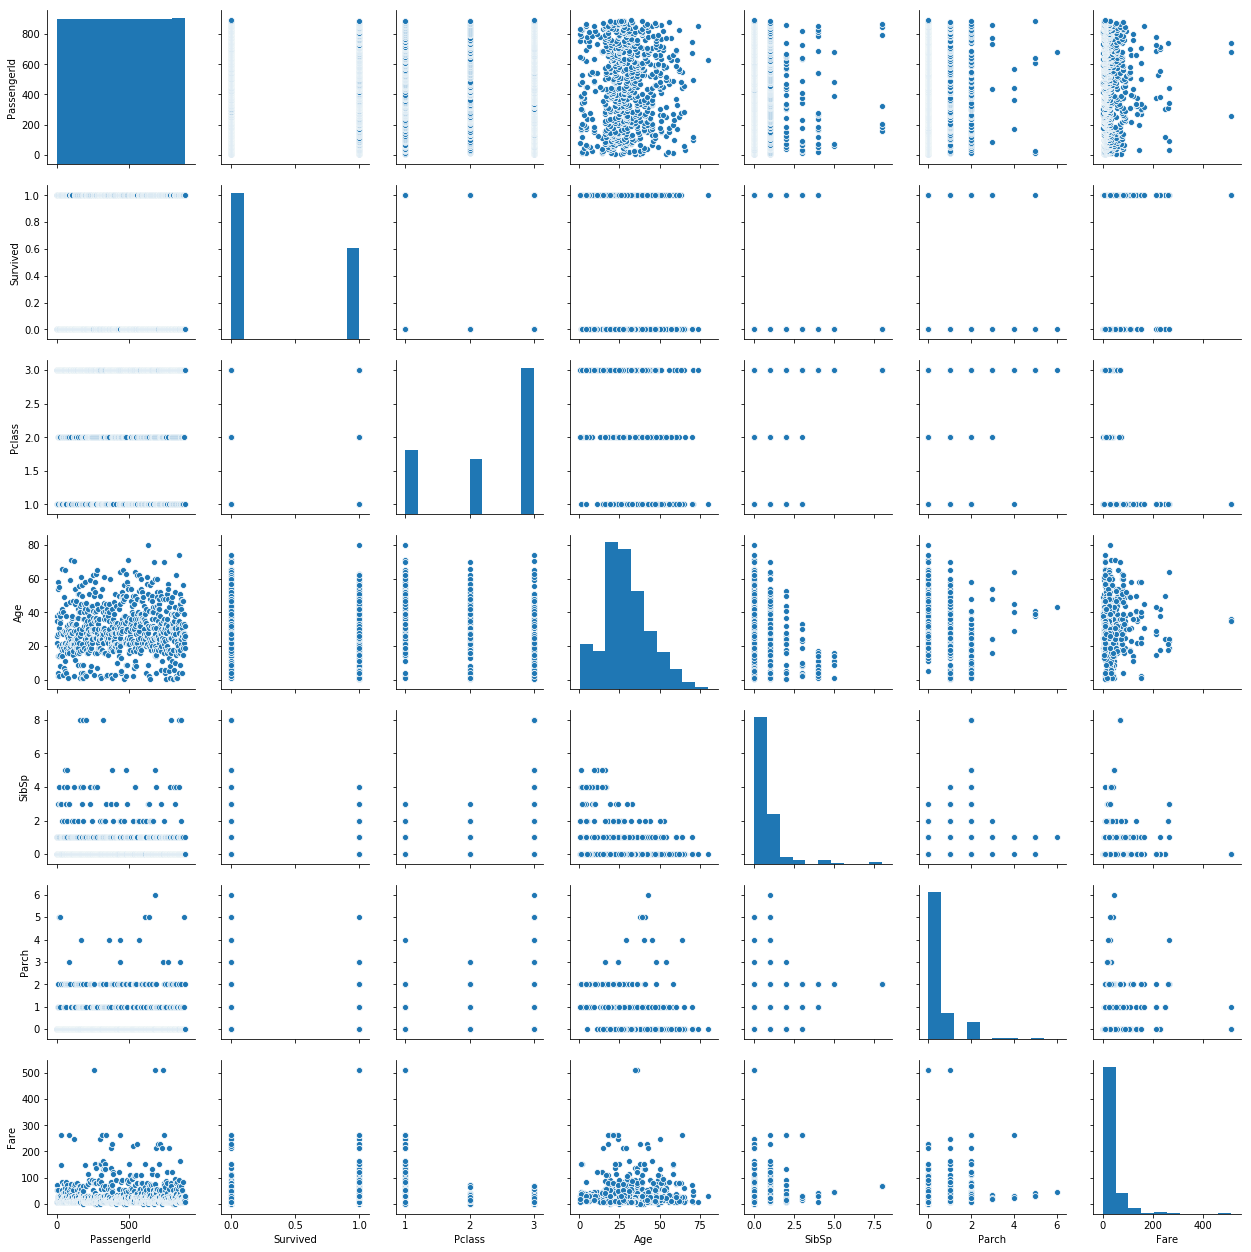

In [198]:
sns.pairplot(df)

In [0]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


In [200]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,2,0


In [0]:
df.drop(['Cabin','Name','Ticket','PassengerId','SibSp' , 'Parch'] , axis =1, inplace =True)

In [0]:
df.loc[df['Embarked'].isnull(),['Embarked']] = 'S' 
from sklearn.preprocessing import  LabelEncoder, StandardScaler
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Title'] = le.fit_transform(df['Title'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [203]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,1,22.0,7.2500,2,2,2,0
1,1,1,0,38.0,71.2833,0,3,2,0
2,1,3,0,26.0,7.9250,2,1,1,1
3,1,1,0,35.0,53.1000,2,3,2,0
4,0,3,1,35.0,8.0500,2,2,1,1
5,0,3,1,NaN,8.4583,1,2,1,1
6,0,1,1,54.0,51.8625,2,2,1,1
7,0,3,1,2.0,21.0750,2,0,5,0
8,1,3,0,27.0,11.1333,2,3,3,0
9,1,2,0,14.0,30.0708,0,3,2,0


In [0]:
from sklearn import neighbors
test = df[df['Age'].isnull()]
train =df[df['Age'].notnull()]
X_test = test.drop(['Age'], axis =1)
X_train = train.drop(['Age'], axis =1)
y_train = train['Age'];




knn = neighbors.KNeighborsRegressor(5, weights='distance')
y_pred = knn.fit(X_train, y_train).predict(X_test)

In [0]:
X_test['Age'] =  y_pred
X_train['Age'] = y_train


dfInput = pd.concat([X_test, X_train])

df = dfInput
#df.loc[df['Age'].isnull(),['Age']] = df['Age'].median() 

In [206]:
df

,Survived,Pclass,Sex,Fare,Embarked,Title,FamilySize,IsAlone,Age
5,0,3,1,8.4583,1,2,1,1,47.800000
17,1,2,1,13.0000,2,2,1,1,35.666667
19,1,3,0,7.2250,0,3,1,1,26.732948
26,0,3,1,7.2250,0,2,1,1,35.125000
28,1,3,0,7.8792,1,1,1,1,19.000000
29,0,3,1,7.8958,2,2,1,1,29.800000
31,1,1,0,146.5208,0,3,2,0,30.269644
32,1,3,0,7.7500,1,1,1,1,19.000000
36,1,3,1,7.2292,0,2,1,1,20.000000
42,0,3,1,7.8958,0,2,1,1,34.000000


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 5 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Age           891 non-null float64
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [0]:
X = df.drop('Survived', axis=1)
y= df['Survived']

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True

    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
        
        df_vif = pd.DataFrame()
        df_vif["VIF Factor"] = vif
        df_vif["features"] = cols[variables]
        print(df_vif.sort_values(by=['VIF Factor'], ascending=False))
        
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]
  
  

In [210]:
calculate_vif_(df)

   VIF Factor    features
1    9.626833      Pclass
5    8.762931       Title
8    8.574937         Age
7    5.387764     IsAlone
4    4.962685    Embarked
6    4.881229  FamilySize
2    3.903798         Sex
3    1.982548        Fare
0    1.970599    Survived
Remaining variables:
Index(['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Title', 'FamilySize',
       'IsAlone', 'Age'],
      dtype='object')


,Survived,Pclass,Sex,Fare,Embarked,Title,FamilySize,IsAlone,Age
5,0,3,1,8.4583,1,2,1,1,47.800000
17,1,2,1,13.0000,2,2,1,1,35.666667
19,1,3,0,7.2250,0,3,1,1,26.732948
26,0,3,1,7.2250,0,2,1,1,35.125000
28,1,3,0,7.8792,1,1,1,1,19.000000
29,0,3,1,7.8958,2,2,1,1,29.800000
31,1,1,0,146.5208,0,3,2,0,30.269644
32,1,3,0,7.7500,1,1,1,1,19.000000
36,1,3,1,7.2292,0,2,1,1,20.000000
42,0,3,1,7.8958,0,2,1,1,34.000000


In [0]:
def applyGridSrch(modelObj,param_grid,x_train,x_test, y_train, y_test, label):
    clf = GridSearchCV(modelObj, param_grid, cv=5)
    clf.fit(x_train, y_train)
    print("========================================================================")
    print("Best parameters set found on development set:" , clf.best_params_)
    print("========================================================================")
    print("Best Scores", clf.best_score_)
    print("========================================================================")
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    print("========================================================================")
    print(means,stds)
    y_pred = clf.predict(x_test)
    ## Based on predicted value, compute various stats for model evaluation
    print("==========================================================================")
    print(label)
    print("==========================================================================")
    print('Accuracy Score: %.6f' % (accuracy_score(y_test,y_pred)*100))
    print('Confusion Matrix: ', confusion_matrix(y_test,y_pred), sep = '\n')
    print("==========================================================================")
    ## Classification report
    cr = classification_report(y_test, y_pred)
    print("Classification Report")
    print("==========================================================================")
    print(cr)
    print("==========================================================================")
    
    ## Calculating roc accuracy score and Gini coefficient
    fpr, tpr, thresh = roc_curve(y_pred, y_test)
    roc_auc = auc(fpr, tpr)
    
    print('ROC Value = %0.6f' % roc_auc)
    print("==========================================================================")
    
    ## Drwing ROC cureve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.6f)' % roc_auc)
    plt.plot([0,1], [0,1], color='navy', linestyle='--')
    
    #plt.plot(fpr[1], tpr[1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
       
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
        
    plt.show()
        

In [0]:
#importing all the packages
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning, RuntimeWarning))
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , cross_val_score
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ,  StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve, auc, roc_auc_score
from sklearn import svm
%matplotlib inline

Best parameters set found on development set: {'max_depth': 7, 'n_estimators': 5}
Best Scores 0.8398876404494382
Grid scores on development set:
[0.81039326 0.81601124 0.82865169 0.8258427  0.8258427  0.8258427
 0.82303371 0.82162921 0.81601124 0.82724719 0.8258427  0.82724719
 0.83426966 0.82865169 0.82865169 0.82724719 0.83005618 0.82022472
 0.83005618 0.82865169 0.83707865 0.82724719 0.8258427  0.83005618
 0.82303371 0.81460674 0.81741573 0.81882022 0.81601124 0.82724719
 0.83005618 0.83286517 0.82865169 0.83146067 0.83988764 0.83426966
 0.83707865 0.83988764 0.83988764 0.83707865 0.81179775 0.81882022
 0.81882022 0.81882022 0.8244382  0.81882022 0.82162921 0.8244382
 0.82162921 0.81741573 0.82022472 0.81741573 0.82865169 0.82724719
 0.8244382  0.83426966] [0.01820022 0.01516747 0.02157577 0.02455122 0.01851393 0.02013015
 0.01539551 0.01184751 0.03567253 0.00920866 0.01189792 0.00828756
 0.00958838 0.02075886 0.01824424 0.01943501 0.02548153 0.01853294
 0.02046572 0.01430688 0.0119

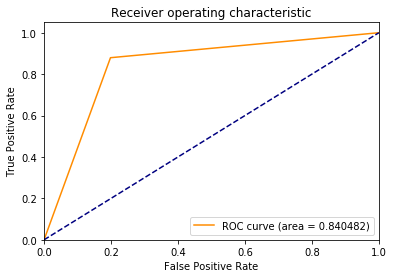

In [213]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators': [3,4,5,6,7,8,9,10] , 'max_depth' :[3,4,5,6,7,8,9]}
applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test," Random Forest Decision Tree")


Best parameters set found on development set: {'max_depth': 7, 'min_samples_leaf': 4}
Best Scores 0.8314606741573034
Grid scores on development set:
[0.79775281 0.79775281 0.79775281 0.79634831 0.79634831 0.79634831
 0.81179775 0.81320225 0.81601124 0.81601124 0.81601124 0.81741573
 0.80898876 0.80758427 0.81039326 0.81601124 0.81882022 0.81882022
 0.81882022 0.82303371 0.83005618 0.8258427  0.82724719 0.81741573
 0.81039326 0.81741573 0.8244382  0.8244382  0.81882022 0.81039326
 0.80337079 0.81601124 0.83146067 0.82865169 0.82162921 0.81179775
 0.81601124 0.83146067 0.82865169 0.82724719 0.82022472 0.81039326
 0.80758427 0.83146067 0.83005618 0.82724719 0.82162921 0.81039326
 0.80196629 0.81741573 0.81460674 0.8258427  0.82162921 0.81039326] [0.00923959 0.00923959 0.00923959 0.00994208 0.00994208 0.00994208
 0.01620984 0.01502226 0.01906863 0.02104137 0.02104137 0.01828847
 0.02104178 0.02422191 0.02964289 0.01852962 0.01906541 0.0236919
 0.01882445 0.01791619 0.02605195 0.03152397 0.

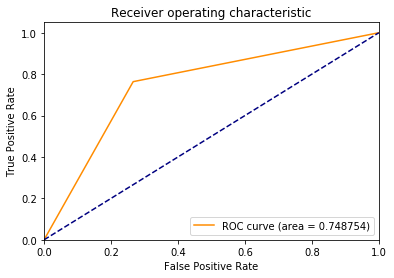

Best parameters set found on development set: {'C': 1000, 'gamma': 0.001}
Best Scores 0.8089887640449438
Grid scores on development set:
[0.625      0.625      0.625      0.625      0.625      0.625
 0.625      0.625      0.625      0.625      0.625      0.625
 0.67696629 0.67275281 0.64044944 0.625      0.62640449 0.62640449
 0.67134831 0.7008427  0.71629213 0.71629213 0.66853933 0.72331461
 0.69241573 0.75702247 0.77808989 0.73174157 0.66994382 0.76264045
 0.79073034 0.80617978 0.77808989 0.71488764 0.6741573  0.74016854
 0.79634831 0.80898876 0.76264045 0.71207865 0.66292135 0.73174157] [0.00214869 0.00214869 0.00214869 0.00214869 0.00214869 0.00214869
 0.00214869 0.00214869 0.00214869 0.00214869 0.00214869 0.00214869
 0.02019219 0.02639405 0.01298134 0.00214869 0.00418096 0.00225824
 0.01846469 0.03023691 0.02940925 0.03012492 0.01879975 0.01602848
 0.0192911  0.01249714 0.03014266 0.04373016 0.02380014 0.03516562
 0.02906658 0.01798691 0.02593956 0.04803909 0.02112928 0.03808125
 

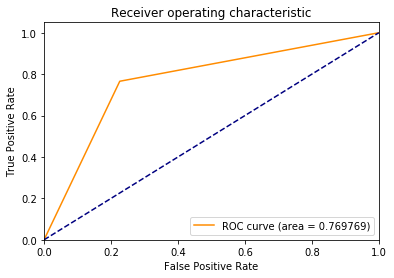

In [214]:
  classifier = svm.SVC() 
  Cs = [0.001, 0.01, 0.1, 1, 10,100,1000]
  gammas = [0.0001, 0.001, 0.01, 0.1, 1, 0.025]
  param_grid = {'C': Cs, 'gamma' : gammas}
  applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test,"Support Vector Machines")